In [65]:
# testing pickle file
import pickle
import os

In [66]:
# loading Fed Speeches
df = pickle.load( open( "all_fed_speeches", "rb" ) )

In [67]:
df.sample(10)

,date,speaker,title,link,text
337,2011-11-11,Vice Chair Janet L. Yellen,Pursuing Financial Stability at the Federal Re...,/newsevents/speech/yellen20111111a.htm,\n Let me begin by thanking the Federal ...
127,2007-04-11,Chairman Ben S. Bernanke,Financial Regulation and the Invisible Hand,/newsevents/speech/bernanke20070411a.htm,Market forces determine most outcomes in our e...
273,2009-02-16,Governor Elizabeth A. Duke,Stabilizing the Housing Market: Focus on Commu...,/newsevents/speech/duke20090216a.htm,It is great to be back here with community ban...
648,2017-06-01,Governor Jerome H. Powell,Thoughts on the Normalization of Monetary Policy,/newsevents/speech/powell20170601a.htm,Thank you for the opportunity to speak here at...
174,2008-06-16,Chairman Ben S. Bernanke,Challenges for Health-Care Reform,/newsevents/speech/bernanke20080616a.htm,Improving the performance of our health-care s...
0,2006-12-15,Chairman Ben S. Bernanke,The Chinese Economy: Progress and Challenges,/newsevents/speech/bernanke20061215a.htm,The emergence of China as a global economic po...
495,2014-08-22,Chair Janet L. Yellen,Labor Market Dynamics and Monetary Policy,/newsevents/speech/yellen20140822a.htm,\n In the five years since the end of th...
693,2018-08-24,Chairman Jerome H. Powell,Monetary Policy in a Changing Economy,/newsevents/speech/powell20180824a.htm,Thank you for the opportunity to speak here to...
409,2012-04-13,Chairman Ben S. Bernanke,Some Reflections on the Crisis and the Policy ...,/newsevents/speech/bernanke20120413a.htm,\n I would like to thank the conference ...
341,2011-11-04,Governor Daniel K. Tarullo,The International Agenda for Financial Regulation,/newsevents/speech/tarullo20111104a.htm,\n Long before the recent financial cris...


## Testing interest rate data

In [82]:
df = pickle.load(open("data/interest_rate_data", "rb" ) )

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2006-01-03 to 2019-03-28
Data columns (total 8 columns):
3 MO     3313 non-null float64
6 MO     3313 non-null float64
1 YR     3313 non-null float64
2 YR     3313 non-null float64
3 YR     3313 non-null float64
5 YR     3313 non-null float64
7 YR     3313 non-null float64
10 YR    3313 non-null float64
dtypes: float64(8)
memory usage: 232.9 KB


In [81]:
pwd

'/Users/davidsmith/Documents/Galvanize/Capstone'

In [79]:
df = pickle.load( open( "data/FX_data", "rb" ) )

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3316 entries, 2006-01-03 to 2019-03-22
Data columns (total 3 columns):
Value    3316 non-null float64
GBP      3316 non-null float64
JPY      3316 non-null float64
dtypes: float64(3)
memory usage: 103.6 KB


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import pickle
import os


In [64]:
whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame                3 MO  6 MO  1<...>\n[3313 rows x 8 columns]
df_EUR     DataFrame                 Value     GB<...>\n[3316 rows x 3 columns]
df_FX      DataFrame                 Value     GB<...>\n[3316 rows x 3 columns]
df_GBP     DataFrame                 Value\nDate <...>\n[3316 rows x 1 columns]
df_JPY     DataFrame                 Value\nDate <...>\n[3316 rows x 1 columns]
np         module       <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os         module       <module 'os' from '/anaco<...>da3/lib/python3.6/os.py'>
pd         module       <module 'pandas' from '/a<...>ages/pandas/__init__.py'>
pickle     module       <module 'pickle' from '/a<...>lib/python3.6/pickle.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
quandl     module       <module 'quandl' from '/a<...>ages/quandl/__init__.py'>
sns        module       <module 'seaborn' from '/<..

In [83]:
# testing dataframe merging crap

In [85]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR
Date,,,,,,,,
2006-01-03,4.16,4.40,4.38,4.34,4.30,4.30,4.32,4.37
2006-01-04,4.19,4.37,4.35,4.31,4.28,4.28,4.31,4.36
2006-01-05,4.20,4.37,4.36,4.32,4.29,4.29,4.31,4.36
2006-01-06,4.22,4.39,4.38,4.36,4.32,4.32,4.33,4.38
2006-01-09,4.23,4.40,4.39,4.36,4.32,4.32,4.34,4.38


In [86]:
import numpy as np
import pandas as pd
import pyflux as pf
import datetime as datetime
import matplotlib.pyplot as plt

import os
import pickle



In [87]:
pwd


'/Users/davidsmith/Documents/Galvanize/Capstone'

In [88]:
X = pickle.load(open("data/interest_rate_data", "rb" ))
X_fwds = pickle.load(open('data/forward_rates', 'rb'))
X_zeros = pickle.load(open('data/zero_rates', 'rb'))


In [89]:
whos

Variable   Type         Data/Info
---------------------------------
X          DataFrame                  3 MO    6 M<...>\n[3313 rows x 8 columns]
X_fwds     DataFrame                  6 MO    1 Y<...>\n[3313 rows x 7 columns]
X_zeros    DataFrame                  3 MO    6 M<...>\n[3313 rows x 8 columns]
datetime   module       <module 'datetime' from '<...>b/python3.6/datetime.py'>
df         DataFrame                3 MO  6 MO  1<...>\n[3313 rows x 8 columns]
df_EUR     DataFrame                 Value     GB<...>\n[3316 rows x 3 columns]
df_FX      DataFrame                 Value     GB<...>\n[3316 rows x 3 columns]
df_GBP     DataFrame                 Value\nDate <...>\n[3316 rows x 1 columns]
df_JPY     DataFrame                 Value\nDate <...>\n[3316 rows x 1 columns]
np         module       <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os         module       <module 'os' from '/anaco<...>da3/lib/python3.6/os.py'>
pd         module       <module 'pandas' from '/a<..

In [99]:
# below I am testing the smaller dataset of the fed speeches
#df_FED = pickle.load( open( "src/more_fed_speeches", "rb" ) )
df_FED = pickle.load(open('src/small_ts_cosine_sim', 'rb'))

In [101]:
cos_last = df_FED[0]
cos_avg_n = df_FED[1]
ts_dates = df_FED[2]


In [102]:
print(type(ts_dates))

<class 'numpy.ndarray'>


In [103]:
ts_dates

array(['12/13/2017', '12/07/2018', '12/06/2018', '12/05/2018',
       '12/03/2018', '12/03/2018', '12/03/2018', '11/30/2017',
       '11/28/2018', '11/27/2018', '11/16/2018', '11/16/2017',
       '11/15/2017', '11/13/2018', '11/09/2018', '11/07/2017',
       '11/02/2017', '10/25/2018', '10/20/2017', '10/18/2018',
       '10/18/2017', '10/17/2018', '10/15/2018', '10/15/2017',
       '10/12/2017', '10/12/2017', '10/05/2017', '10/04/2018',
       '10/04/2017', '10/03/2018', '10/02/2018', '09/28/2017',
       '09/27/2018', '09/27/2017', '09/26/2017', '09/26/2017',
       '09/12/2018', '09/05/2017', '08/30/2017', '08/25/2017',
       '08/24/2018', '07/31/2017', '07/28/2017', '07/19/2018',
       '07/18/2018', '07/13/2017', '07/11/2017', '07/06/2017',
       '07/06/2017', '06/27/2018', '06/27/2017', '06/26/2017',
       '06/23/2017', '06/20/2018', '06/20/2017', '06/01/2017'],
      dtype=object)

# NOW MATCH WITH MY DATAFRAME

In [122]:
X_zeros['cos_sim'] = 0
X_zeros['cos_avg'] = 0
X_zeros.head()



,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,cos_sim,cos_avg
Date,,,,,,,,,,
2006-01-03,0.0416,0.0440,0.0438,0.0434,0.0430,0.0430,0.04321,0.04378,0,0
2006-01-04,0.0419,0.0437,0.0435,0.0431,0.0428,0.0428,0.04312,0.04368,0,0
2006-01-05,0.0420,0.0437,0.0436,0.0432,0.0429,0.0429,0.04312,0.04368,0,0
2006-01-06,0.0422,0.0439,0.0438,0.0436,0.0432,0.0432,0.04331,0.04387,0,0
2006-01-09,0.0423,0.0440,0.0439,0.0436,0.0432,0.0432,0.04341,0.04386,0,0


In [108]:
i = 0
this_date = ts_dates[i]
this_date

'12/13/2017'

In [109]:
temp = X_zeros.loc[this_date]

In [111]:
X_zeros['cos_sim'].loc[this_date] = cos_last[i]

In [112]:
X_zeros.loc[this_date]

3 MO       0.013000
6 MO       0.014700
1 YR       0.016800
2 YR       0.018000
3 YR       0.019100
5 YR       0.021300
7 YR       0.022720
10 YR      0.023760
cos_sim    0.214142
Name: 2017-12-13 00:00:00, dtype: float64

In [123]:
for i in range(len(ts_dates)):
    X_zeros['cos_sim'].loc[ts_dates[i]] = cos_last[i]
    X_zeros['cos_avg'].loc[ts_dates[i]] = cos_avg_n[i]

In [116]:
X_zeros.describe()


,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,cos_sim
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,0.011427,0.012523,0.013427,0.015489,0.017683,0.022316,0.026187,0.029921,0.000235
std,0.016504,0.016720,0.016194,0.014752,0.013689,0.011916,0.010632,0.009779,0.007881
min,0.000000,0.000200,0.000800,0.001700,0.002900,0.005700,0.009190,0.013840,0.000000
25%,0.000600,0.001200,0.001900,0.004800,0.008400,0.014200,0.019050,0.022300,0.000000
50%,0.001800,0.003100,0.004900,0.008800,0.012800,0.018600,0.023120,0.027800,0.000000
75%,0.017800,0.019500,0.021200,0.023500,0.024600,0.027400,0.031490,0.037030,0.000000
max,0.051900,0.053300,0.053000,0.052900,0.052600,0.052300,0.052300,0.052730,0.305875


In [117]:
np.max(cos_last)

0.3732864065184788

In [124]:
sum_cost = np.sum(cos_last)
print('This is the sum of the cosine from cos_last', sum_cost)

This is the sum of the cosine from cos_last 12.704427820166046


In [125]:
sum_zeros = np.sum(X_zeros['cos_sim'])
print('This is the sum from the dateframe:',sum_zeros)

This is the sum from the dateframe: 11.708600961822395


In [126]:
sum_avg = np.sum(cos_avg_n)
print('This is the sum of the cosine from cos_last', sum_avg)
sum_z_avg = np.sum(X_zeros['cos_avg'])
print('This is the sum from the dateframe:',sum_z_avg)

This is the sum of the cosine from cos_last 12.81906434926012
This is the sum from the dateframe: 11.762947465314527


In [129]:
X_zeros.describe()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,cos_sim,cos_avg
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,0.011427,0.012523,0.013427,0.015489,0.017683,0.022316,0.026187,0.029921,0.000235,0.000235
std,0.016504,0.016720,0.016194,0.014752,0.013689,0.011916,0.010632,0.009779,0.007881,0.007881
min,0.000000,0.000200,0.000800,0.001700,0.002900,0.005700,0.009190,0.013840,0.000000,0.000000
25%,0.000600,0.001200,0.001900,0.004800,0.008400,0.014200,0.019050,0.022300,0.000000,0.000000
50%,0.001800,0.003100,0.004900,0.008800,0.012800,0.018600,0.023120,0.027800,0.000000,0.000000
75%,0.017800,0.019500,0.021200,0.023500,0.024600,0.027400,0.031490,0.037030,0.000000,0.000000
max,0.051900,0.053300,0.053000,0.052900,0.052600,0.052300,0.052300,0.052730,0.305875,0.305875


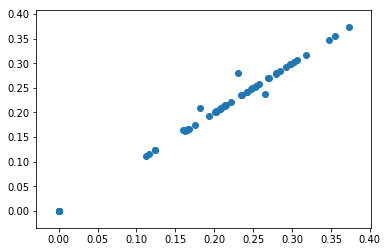

In [130]:
plt.scatter(X_zeros['cos_sim'], X_zeros['cos_avg'])

In [131]:
print(X.describe())

              3 MO         6 MO         1 YR         2 YR         3 YR  \
count  3313.000000  3313.000000  3313.000000  3313.000000  3313.000000   
mean      0.011427     0.012523     0.013427     0.015406     0.017595   
std       0.016504     0.016720     0.016194     0.014783     0.013717   
min       0.000000     0.000200     0.000800     0.001600     0.002800   
25%       0.000600     0.001200     0.001900     0.004700     0.008300   
50%       0.001800     0.003100     0.004900     0.008700     0.012700   
75%       0.017800     0.019500     0.021200     0.023400     0.024500   
max       0.051900     0.053300     0.053000     0.052900     0.052600   

              5 YR         7 YR        10 YR  
count  3313.000000  3313.000000  3313.000000  
mean      0.022151     0.025897     0.029388  
std       0.011938     0.010655     0.009759  
min       0.005600     0.009100     0.013700  
25%       0.014000     0.018800     0.021900  
50%       0.018400     0.022800     0.027100  
75% 